Image shape: torch.Size([1, 28, 28])


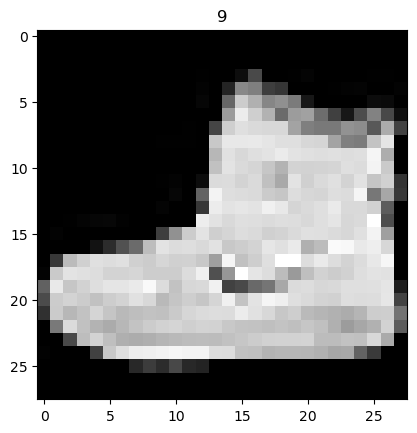

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Random image:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.3490, 0.3765, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0824, 0.3137, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.2275, 0.7333, 0.2627, 0.0000, 0.1529, 1.0000, 0.3490,
          0.0000, 0.6706, 0.1059, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431,
          0.0431, 0.3255, 0.5686, 0.0000, 0.0235, 0.0118, 0.2157, 0.0353,
          0.0000, 0.5294, 0.3333, 0.0039, 0.0510, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.082

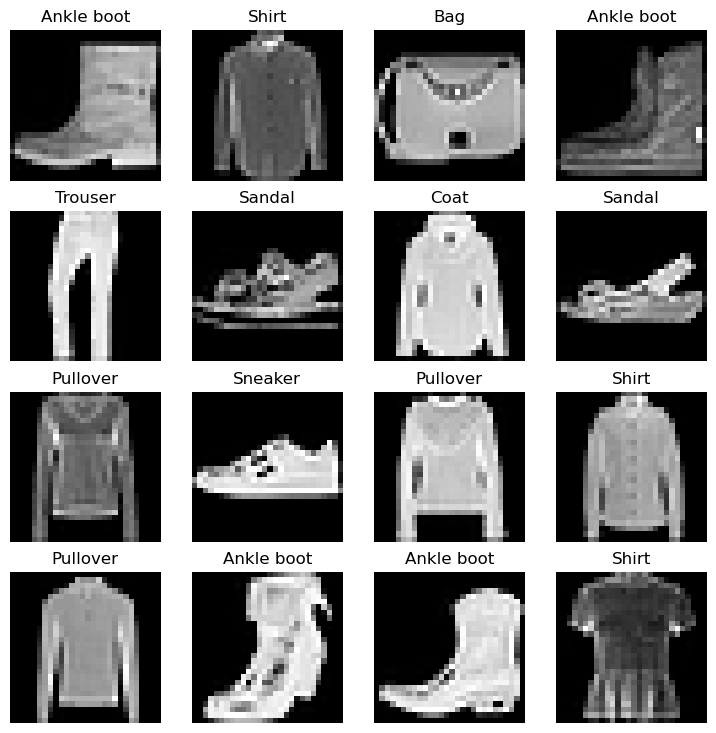

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001C1D5E7E6D0>, <torch.utils.data.dataloader.DataLoader object at 0x000001C1D5CA6C90>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


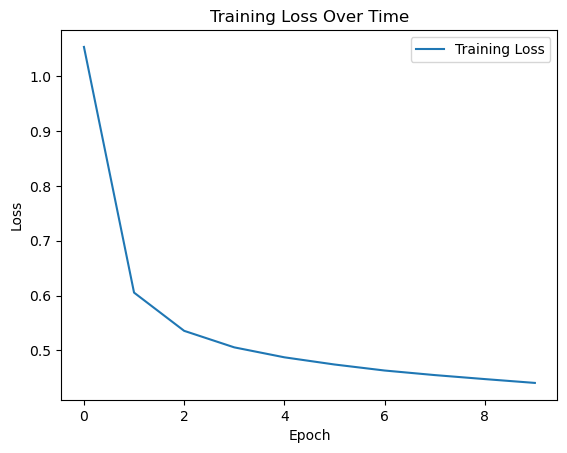

In [1]:
from random import randint, random
from math import sqrt, fabs

def individual(length, vmin, vmax):
    '''
    Create a member of the population - an individual

    length: the number of genes (components)
    vmin: the minimum possible value 
    vmax: the maximum possible value 
    '''
    return [random() * (vmax - vmin) + vmin for _ in range(length)]

def population(count, length, vmin, vmax):
    """
    Create a number of individuals (i.e. a population).

    count: the number of individuals in the population
    length: the number of values per individual
    vmin: the minimum possible value 
    vmax: the maximum possible value 
    """
    return [individual(length, vmin, vmax) for _ in range(count)]

def fitness(individual):
    """
    Determine the fitness of an individual. Lower is better (minimization problem).

    individual: the individual to evaluate
    """
    x, y = individual
    return 100 * sqrt(fabs(y - 0.01 * x ** 2)) + 0.01 * fabs(x + 10)

def mutate(individual, pM, vmin, vmax):
    '''
    Performs a mutation on an individual with the probability of pM.
    If the event will take place, at a random position a new value will be
    generated in the interval [vmin, vmax]

    individual: the individual to be mutated
    pM: the probability the mutation to occur
    vmin: the minimum possible value 
    vmax: the maximum possible value
    '''
    if pM > random():
        p = randint(0, len(individual) - 1)
        individual[p] = random() * (vmax - vmin) + vmin
    return individual

def crossover(parent1, parent2):
    '''
    Crossover between 2 parents
    '''
    child = []
    alpha = random()
    for x in range(len(parent1)):
        child.append(alpha * (parent1[x] - parent2[x]) + parent2[x])
    return child

def iteration(pop, pM, vmin, vmax):
    '''
    An iteration

    pop: the current population
    pM: the probability the mutation to occur
    vmin: the minimum possible value 
    vmax: the maximum possible value
    '''
    i1 = randint(0, len(pop) - 1)
    i2 = randint(0, len(pop) - 1)
    if i1 != i2:
        c = crossover(pop[i1], pop[i2])
        c = mutate(c, pM, vmin, vmax)
        f1 = fitness(pop[i1])
        f2 = fitness(pop[i2])
        fc = fitness(c)
        if (f1 > f2) and (f1 > fc):
            pop[i1] = c
        if (f2 > f1) and (f2 > fc):
            pop[i2] = c
    return pop

def main(noIteratii=10000):
    # PARAMETERS:

    # Population size
    dimPopulation = 100
    # Individual size
    dimIndividual = 2
    # The boundaries of the search interval
    vmin = -15
    vmax = 5
    # The mutation probability
    pM = 0.01

    P = population(dimPopulation, dimIndividual, vmin, vmax)
    for i in range(noIteratii):
        P = iteration(P, pM, vmin, vmax)

    # Print the best individual
    graded = [(fitness(x), x) for x in P]
    graded = sorted(graded)
    result = graded[0]
    fitnessOptim = result[0]
    individualOptim = result[1]
    print('Result: The detected minimum point after %d iterations is f(%3.2f %3.2f) = %3.2f' %
          (noIteratii, individualOptim[0], individualOptim[1], fitnessOptim))

main()
